# Model Selection : Random Forest
This part aims to assess the performances of the random forest model

In [1]:
library(randomForest)
training_set <- read.csv("../Data/PreProcess/processed_training_data_split.csv")
validation_set <- read.csv("../Data/PreProcess/processed_verification_data_split.csv") # load training and validation sets

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [2]:
column_to_drop<-c("X.1","X","wind.powered","dam","None","X40")
# Dropped "X.1","X" because they just represent the row number
# Also dropped "wind.powered","dam","None" and "X40" because they mean decrease accuracy was 0
training_set<-training_set[,!(names(training_set) %in% column_to_drop)] # drop the desired columns on training set
validation_set<-validation_set[,!(names(validation_set) %in% column_to_drop)] # drop the desired columns on validation set

## Model Setting and Training : 

In [3]:
training_set$id = factor(training_set$id) 
classifierRF = randomForest(id ~ ., data=training_set, ntree=450,  mtry=20, importance=TRUE)
save(classifierRF,file = "4-Models/random_forest.RData")
#BELOWN IS PUT IN COMMENT THE RESULTS OF PARAMETERS TWEAKING

#bench (funder, installer and  ward dropped)
#tree : 100 , split : 8 , error rate : 22.36% -> ~90% error rate at functional needs repair (worst class) (77% accuracy on val set)
#tree : 200 , split : 8 , error rate : 22.43%
#tree : 80 , split : 8, error rate : 22.49%  
#tree : 100 , split : 10, error rate : 21.84%
#tree : 120 , split : 10, error rate : 21.82%
#tree : 150 , split : 12, error rate : 21.47%  -> ~83% error rate ..... (78% acc. on val. set)
#tree : 120 , split : 15, error rate : 21.35% -> ~80% error rate at functional needs repair 
#tree : 250, split : 15, error rate : 21.35% -> ~80% error rate at functional needs repair 
#tree : 250, split : 8, error rate : 22.26% -> ~90% error rate at functional needs repair
#tree : 120, split : 20, error rate : 21.21% -> ~77% error rate at functional needs repair
#tree : 120, split : 35, error rate : 21.59% -> ~75% error rate at functional needs repair (78% accuracy on validation set)
#tree : 200, split : 25, error rate : 21.13% -> ~75% error rate at functional needs repair (78% acc. on val. set-)
#tree : 250, split : 28, error rate : 21.12% -> ~75% error rate at functional needs repair (78% acc. on val. set-)
#tree : 500, split : 25, error rate : 21.2% -> ~76% error rate at functional needs repair (78 % acc. on val. set-)
#(error rate = OOB)

# increasing tree number decreases the variance and keeps the bias constant -> good way to avoid overfitting

# bench with classified funder (big/small):
#tree : 450, split : 20, error rate : 20.99% -> 76% error rate at functional needs repair (78.4% acc. on val. set-)
#tree : 600, split : 18, error rate : 20.94% ->77 % error rate at functional needs repair (78.3% acc. on val. set-)
#tree : 450, split : 18, error rate : 20.88% -> 77% error rate at functional needs repair (78.52% acc. on val. set-)
#tree : 350, split : 18, error rate : 21% ->77 % error rate at functional needs repair (78.48% acc. on val. set-)
#tree : 350, split : 20, error rate : 21% ->76 % error rate at functional needs repair (78.4% acc. on val. set-)
#tree : 350, split : 23, error rate : 21.07% ->75.2 % error rate at functional needs repair (78.4% acc. on val. set-)
#tree : 350, split : 25, error rate : 21.1% -> 74.5% error rate at functional needs repair (78% acc. on val. set-)
#tree : 350, split : 29, error rate : 21.24% -> 73.5% error rate at functional needs repair (78.3% acc. on val. set-)
#tree : 350, split : 27, error rate : 21.29% -> 74.4% error rate at functional needs repair (78.3% acc. on val. set-)
#tree : 350, split : 32, error rate : 21.35% -> 73.5% error rate at functional needs repair (78.4% acc. on val. set-)


## For now : best parameters are at 450 trees and 18 random features per tree (wth funders)
### results -> 78.5% accuracy on validation set BUT still 77% of error rate for the 'functional needs repair' class
## Model Performances (OOB) :


Call:
 randomForest(formula = id ~ ., data = training_set, ntree = 450,      mtry = 20, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 450
No. of variables tried at each split: 20

        OOB estimate of  error rate: 21.02%
Confusion matrix:
                        functional functional needs repair non functional
functional                   22977                     390           2368
functional needs repair       1977                     823            600
non functional                4412                     191          13551
                        class.error
functional                0.1071692
functional needs repair   0.7579412
non functional            0.2535529

,functional,functional.needs.repair,non.functional,MeanDecreaseAccuracy,MeanDecreaseGini
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Trust,-3.938601e-07,-3.545847e-06,3.224465e-05,1.189527e-05,7.091750
SWC,-3.404432e-05,-2.101347e-08,1.257107e-04,2.976018e-05,5.678394
cattle.trough,1.490706e-04,-8.913635e-06,-5.151810e-05,6.060445e-05,9.773800
X9,2.319529e-04,3.650832e-05,6.249564e-05,1.528468e-04,12.765927
X8,1.529290e-04,9.512416e-04,2.388864e-04,2.435430e-04,21.517459
X7,3.210532e-04,4.045115e-05,4.606678e-04,3.546041e-04,15.687750
X24,8.887581e-04,7.103151e-05,5.222318e-05,5.086737e-04,15.600989
Other,8.224283e-04,2.807694e-04,1.801692e-04,5.367065e-04,38.619086
X99,1.432436e-04,9.771172e-05,1.235024e-03,5.591804e-04,22.382514


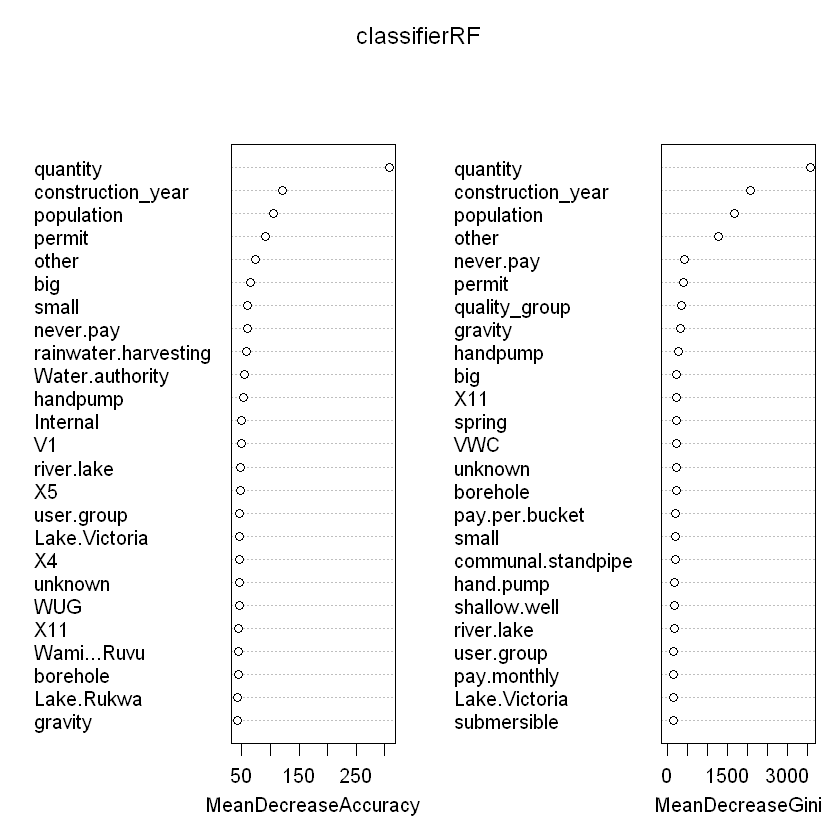

In [4]:
load("4-Models/random_forest.RData")
classifierRF # training outcome
varImpPlot(classifierRF, n.var=min(25, nrow(classifierRF$importance))) # plot mean decrease accuracy per variables
# --> high mean decrease accuracy = variable having a high impact on accuracy
imp<-data.frame(classifierRF$importance)
imp<-imp[order(imp$MeanDecreaseAccuracy),]
imp

### The variables having the highest (positive) impact on model performances are : *quantity*, *construction_year*, *population* and *permit*

## Confusion Matrix on Validation Set :

In [5]:
library(ROCR)
pred <- predict(classifierRF,validation_set) # Model prediction on validation set
dim(validation_set)
table(observed=validation_set$id,predicted=pred) # CONFUSION MATRIX ON VALIDATION SET

[1] 12111    80

                         predicted
observed                  functional functional needs repair non functional
  functional                    5783                     127            613
  functional needs repair        543                     229            145
  non functional                1147                      46           3477